<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSFINANCE/blob/master/Exo_1p91%2C_2p92%2C_4p103_et_2p101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercice 1p91

In [0]:
data_credit = pd.read_pickle("C:/Users/Tommy/Desktop/Cours master 2 dauphine/Semestre 2/Introduction au machine learning avec Python/Exo 1p91, 2p92, 4p103 et 2p101/credit.pkl")
data_credit['A16'].loc[(data_credit["A16"]=="+")] = 1
data_credit['A16'].loc[(data_credit["A16"]=="-")] = 0
data_credit.head(5)

C:\Users\Tommy\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16
0,30.83,0.000,1.25,1.0,202.0,0.0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
1,58.67,4.460,3.04,6.0,43.0,560.0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1
2,24.50,0.500,1.50,0.0,280.0,824.0,1,0,0,1,...,0,1,1,0,1,0,1,0,0,1
3,27.83,1.540,3.75,5.0,100.0,3.0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
4,20.17,5.625,1.71,0.0,120.0,0.0,0,1,0,1,...,0,1,1,0,1,0,0,0,1,1


Question 1

In [0]:
X = data_credit.drop(['A16'],axis=1)
Y = data_credit['A16']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=1998)

NameError: name 'data_credit' is not defined

Question 2

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100 ,max_depth=50,max_features=0.9,random_state=1998)

In [0]:
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features=0.9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1998,
                       verbose=0, warm_start=False)

Question 3

In [0]:
Y_pred = clf.predict(X_test)
Y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

Question 4

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8657407407407407

Question 5

In [0]:
from sklearn.metrics import roc_auc_score, auc
print("Score AUC :",roc_auc_score(Y_test,clf.predict_proba(X_test)[:,1]))

Score AUC : 0.920892320892321


Question 6

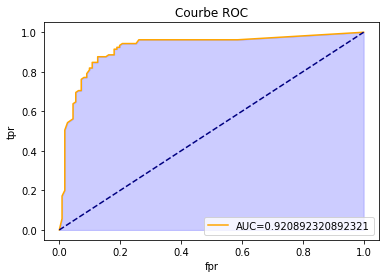

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test,clf.predict_proba(X_test)[:,1])

from sklearn.metrics import roc_auc_score, auc
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',label='AUC='+str(auc(fpr,tpr)))
plt.fill_between(fpr,tpr,color='b',alpha=0.2)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.title("Courbe ROC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc="lower right")
plt.show()

Question 7

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[98, 13],
       [16, 89]], dtype=int64)

Question 8

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':list(range(100,130)), 'max_depth':list(range(5,10)),\
'max_features':list(range(10,20))}

from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
clf = GridSearchCV(rdf, parameters,scoring='roc_auc')
clf.fit(X_train,Y_train)

C:\Users\Tommy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_sco...
                                              warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 6, 7, 8, 9],


In [0]:
print("Meilleurs paramètres :",clf.best_params_)

Meilleurs paramètres : {'max_depth': 5, 'max_features': 19, 'n_estimators': 107}


In [0]:
print("Meilleur score :",clf.best_score_)

Meilleur score : 0.9510648985157307


Question 9

In [0]:
clf_best = RandomForestClassifier(**clf.best_params_)
clf_best.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=19, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=107,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score ,roc_auc_score, auc
Y_pred = clf_best.predict(X_test)
print("accuracy :",accuracy_score(Y_test,Y_pred))

accuracy : 0.8611111111111112


# Exercice 2p92

Question 2

In [0]:
data_credit = pd.read_pickle("C:/Users/Tommy/Desktop/Cours master 2 dauphine/Semestre 2/Introduction au machine learning avec Python/Exo 1p91, 2p92, 4p103 et 2p101/credit.pkl")
data_credit['A16'].loc[(data_credit["A16"]=="+")] = 1
data_credit['A16'].loc[(data_credit["A16"]=="-")] = 0
data_credit.head(5)

C:\Users\Tommy\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16
0,30.83,0.000,1.25,1.0,202.0,0.0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
1,58.67,4.460,3.04,6.0,43.0,560.0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1
2,24.50,0.500,1.50,0.0,280.0,824.0,1,0,0,1,...,0,1,1,0,1,0,1,0,0,1
3,27.83,1.540,3.75,5.0,100.0,3.0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
4,20.17,5.625,1.71,0.0,120.0,0.0,0,1,0,1,...,0,1,1,0,1,0,0,0,1,1


Question 1

In [0]:
X = data_credit.drop(['A16'],axis=1)
Y = data_credit['A16']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=1998)

Question 2

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,\
max_features=10,max_depth=3, random_state=1998)
clf.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=10, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1998, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Question 3

In [0]:
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
Y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

Question 4

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8472222222222222

Question 5

In [0]:
from sklearn.metrics import roc_auc_score, auc
print("Score AUC :",roc_auc_score(Y_test,clf.predict_proba(X_test)[:,1]))

Score AUC : 0.9316173316173316


Question 6

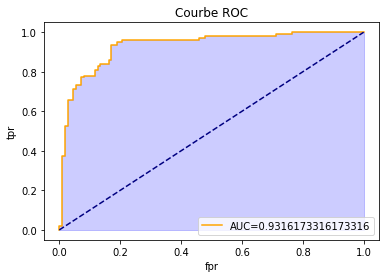

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test,clf.predict_proba(X_test)[:,1])

from sklearn.metrics import roc_auc_score, auc
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',label='AUC='+str(auc(fpr,tpr)))
plt.fill_between(fpr,tpr,color='b',alpha=0.2)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.title("Courbe ROC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc="lower right")
plt.show()

Question 7

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[96, 15],
       [18, 87]], dtype=int64)

Question 8

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV
parameters = { 'max_depth':list(range(3,8)),'loss':['deviance','exponential']}
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(n_estimators= 500)
clf = GridSearchCV(gbt, parameters,scoring='roc_auc')
clf.fit(X_train,Y_train)

C:\Users\Tommy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=500,
                                                  n_iter_no_change=None,
                                                  pre

In [0]:
print("Meilleurs paramètres :",clf.best_params_)

Meilleurs paramètres : {'loss': 'exponential', 'max_depth': 7}


In [0]:
print("Meilleur score :",clf.best_score_)

Meilleur score : 0.9446834626996973


# Exercice 2p101

In [0]:
data_insurance = pd.read_pickle("C:/Users/Tommy/Desktop/Cours master 2 dauphine/Semestre 2/Introduction au machine learning avec Python/Exo 1p91, 2p92, 4p103 et 2p101/insurance.pkl")

In [0]:
X = data_insurance.drop(['charges'],axis=1)
Y = data_insurance['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=1998)

question 2

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
clf =  GradientBoostingRegressor(n_estimators=390,max_depth=4, learning_rate=0.01,random_state=2018)
clf.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=390,
                          n_iter_no_change=None, presort='auto',
                          random_state=2018, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Question 3

In [0]:
from sklearn.metrics import r2_score, mean_absolute_error
Y_pred = clf.predict(X_test)
print("score R2 : ", r2_score(Y_test,Y_pred))
print("score MAE : ", mean_absolute_error(Y_test,Y_pred))

score R2 :  0.8700901533405005
score MAE :  2440.0302787873075


Question 4

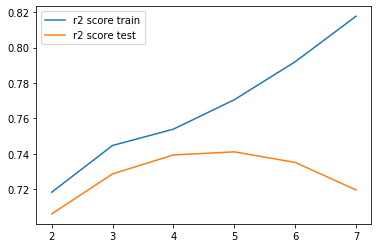

In [0]:
r2train = []
r2test = []
for i in range(2,8):
    clf =  GradientBoostingRegressor(n_estimators=100,max_depth=i, learning_rate=0.01,random_state=2018)
    clf.fit(X_train,Y_train)
    r2train.append(r2_score(Y_train,clf.predict(X_train)))
    r2test.append(r2_score(Y_test,clf.predict(X_test)))
plt.plot(np.arange(2,8,1),r2train,label = 'r2 score train')
plt.plot(np.arange(2,8,1),r2test,label = 'r2 score test')
plt.legend(loc=2);

# Exercice 4p103

In [0]:
data_insurance = pd.read_pickle("C:/Users/Tommy/Desktop/Cours master 2 dauphine/Semestre 2/Introduction au machine learning avec Python/Exo 1p91, 2p92, 4p103 et 2p101/insurance.pkl")
data_insurance.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [0]:
X = data_insurance.drop(['charges'],axis=1)
Y = data_insurance['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=2003)

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':list(range(20,80)),'max_depth':list(range(3,15)), 'max_features':list(range(5,12))}

from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor()
clf = GridSearchCV(rdf, parameters,scoring='r2')
clf.fit(X_train,Y_train)

C:\Users\Tommy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 

In [0]:
clf.best_params_

{'max_depth': 5, 'max_features': 8, 'n_estimators': 78}

In [0]:
clf.best_score_

0.8567231722490457

In [0]:
clf_best = RandomForestRegressor(**clf.best_params_)
clf_best.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=78,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score ,roc_auc_score, auc,r2_score
Y_pred = clf_best.predict(X_test)
print("score R2 :",r2_score(Y_test,Y_pred))

score R2 : 0.8801191282753705


In [0]:
from sklearn.metrics import median_absolute_error
median_absolute_error(Y_test,Y_pred)

1391.722531007629